# Gaussian distributions

Import the required modules.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

Students are doing an exam, marked between 0 and 20, and rounded to half a point.  Since we simulate the exam, we assume that the scores will be distributed according to a Gauss distribution with mean value `mu` and standard deviation `sigma`.  The number of students participating in the exam is `nr_results`.

In [17]:
mu = 16.0
sigma = 1.5
nr_results = 200

Since it is possible that when we sample from a Gaussian distribution we will get negative scores, or scores above 20, we reject those, and continue to sample until we have `nr_results` scores.

In [18]:
results = list()
while len(results) < nr_results:
    result = random.gauss(mu, sigma)
    if 0.0 <= result <= 20.0:
        results.append(round(2*result)/2)

We can visualize the scores using a histogram.

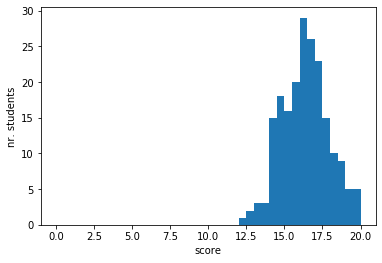

In [21]:
plt.hist(results, bins=np.linspace(0.0, 20.0, 41));
plt.xlabel('score');
plt.ylabel('nr. students');

However, school management prefers scores that are on average somewhat lower, and have a larger standard deviation, i.e., `mu_req` and `sigma_req`.  We can rescale the scores so that the new scores meet these criteria.  Using the formula
$$
\frac{x - \mu}{\sigma} = \frac{x_{\rm new} - \mu_{\rm new}}{\sigma_{\rm new}}
$$
we can obtain the new score as follows:
$$
x_{\rm new} = \frac{\sigma_{\rm new}}{\sigma}(x - \mu) + \mu_{\rm new}
$$

In [22]:
mu_new = 14.0
sigma_new = 4.0

Rescale and round the results.

In [35]:
new_results = map(lambda x: sigma_new*(x - mu)/sigma + mu_new, results)
new_results = list(map(lambda x: round(2*x)/2, new_results))

Plot the resullts.

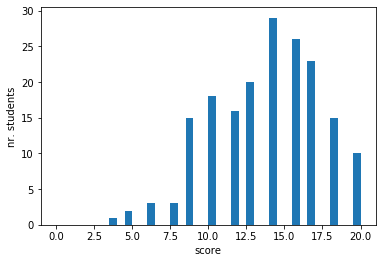

In [36]:
plt.hist(new_results, bins=np.linspace(0.0, 20.0, 41));
plt.xlabel('score');
plt.ylabel('nr. students');

In [39]:
print(f'mean = {np.mean(new_results):.1f}, stddev = {np.std(new_results):.2f}')

mean = 14.3, stddev = 4.14
